## 1. Introduction
Folks, let's work backwards from our deadline and see what needs to be done:

week 14: Need to have all of this done including presentation etc

week 13: By this time, we should be done with all ML models and have results

week 12: Finalize all models and features

week 11: EDA complete and Features identified

It seems like we don't have much time given we are in week 10 now. We need to divvy up the work well and for that, we need to figure out what all needs to be done. Let's spend the next couple of days filling up all the tasks in the sections below. And see how we can knock them off after dividing them up. BTW, feel free to suggest better ways of doing things, and as well, make sure that you get what you want out of this project. My own goal here is to do some amount of decent coding and analysis, and as well do something akin to product management :-)

### Packages used 

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from tqdm import tqdm
from datetime import datetime
import json
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
from ast import literal_eval
from wordcloud import WordCloud
import itertools
from collections import Counter
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### Libraries

In [41]:
def get_dictionary(s):
    try:
        d = literal_eval(s)
    except:
        d = {}
    return d

## 2. Exploratory Data Analysis
Let's list all tasks in some detail here. Feel free to add/delete/modify. I am taking a first stab at it. Aditi/Sid - please add


### Data cleansing tasks

#### Sid
1. Clean up NANs
2. Remove duplicates
3. Other?

### Univariate Analysis
#### Venky
1. Revenue 
2. Budget
3. Release date
4. Overview

#### Aditi
5. Cast
6. Language
7. Keywords
8. Belongs_to_collection

#### Sid
9. Crew
10. Genre
11. Popularity
12. Language
13. Status


### Bivariate analysis
In each case revenue vs the independent variable. Perhaps we also comment on independent variable as well as needed. Some of these are obvious, but we need to break down the tasks amongst us, and hence the detail.
#### Venky
1. Revenue vs Budget
2. Rev vs Directors

#### Sid
3. Rev vs Actors
4. Rev vs Director movie frequency
#### Aditi
5. Rev vs Actor movie frequency
6. Rev vs Language
7. Rev vs Popularity

#### Sid
8. Rev vs Series/non-series (ex: Indiana Jones)
9. Rev vs Genre
#### Venky
10. Rev vs time of release (Xmas, Thanksgiving etc)
11. Rev vs Runtime
12. Rev vs Number of countries released in

### Transformations
Do we need to transform any of the variables. There will be work involved here and we need to divvy up. Some of this is tied to earlier work, so perhaps this will come about naturally
1. Crew -> need to parse and more
2. Timeline of release -> weeks, holidays etc
3. Genre
4. Series
5. Any ratio that we can think of?


### Initial Training Data before Transformations

In [42]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [44]:
train.head(15)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

In [45]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


### Analysis of Key variables vs Revenue

#### 1. Budget of movie

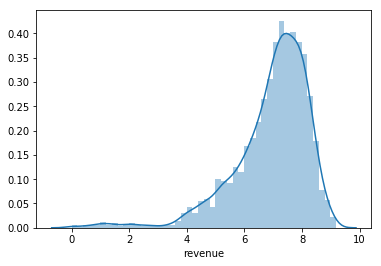

In [132]:
sns.distplot(np.log10(train['revenue']))
plt.show()

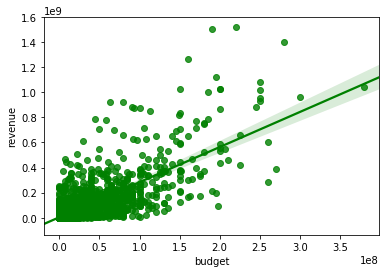

In [124]:
sns.regplot(x="budget", y="revenue", data=train, color="g")
plt.show()

#### 2. Cast

In [48]:
for i,j in enumerate(train['cast'][:2]):
    print(i,j)

0 [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'characte

#### 3. Crew

In [49]:
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in get_dictionary(x)
                                                        if i['job'] != 'Director'] if x != {}
                                               else []).values)


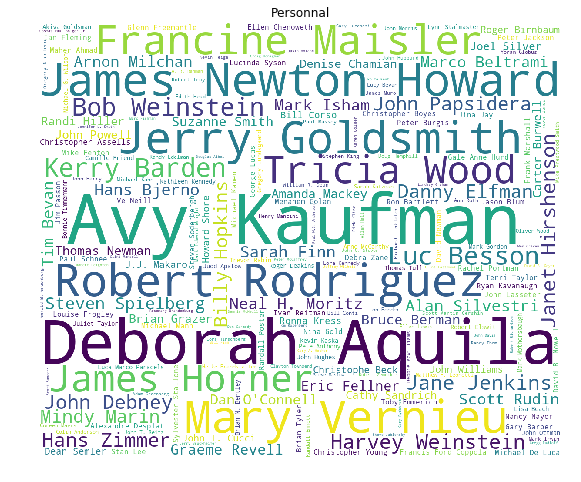

In [52]:
plt.figure(figsize = (12, 8))
text=Counter([i for j in list_of_crew_names for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=True,
                      width=1200, height=1000).generate_from_frequencies(text)
plt.imshow(wordcloud)
plt.title('Personnal')
plt.axis("off")
plt.show()

#### 5. Director

In [ ]:
train['director'] = train['crew'].apply(lambda x: [i['name'] for i in get_dictionary(x) 
                                                   if i['job'] == 'Director']).map(lambda x: ','.join(map(str, x)))

list_of_directors = list(train['crew'].apply(lambda x: [i['name'] for i in get_dictionary(x) 
                                                   if i['job'] == 'Director']).values)


In [55]:
print (train['director'])

0                                              Steve Pink
1                                          Garry Marshall
2                                         Damien Chazelle
3                                             Sujoy Ghosh
4                                          Jong-seok Yoon
5                                          Hal Sutherland
6                                            Ole Bornedal
7                                          Jehane Noujaim
8                                            Brian Henson
9                                       Christopher Guest
10                                       John G. Avildsen
11                                               Joe Roth
12                                             Sam Mendes
13                                           F. Gary Gray
14                                       Steven Spielberg
15                                      Stevan Filipoviƒá
16                                             Wes Craven
17            

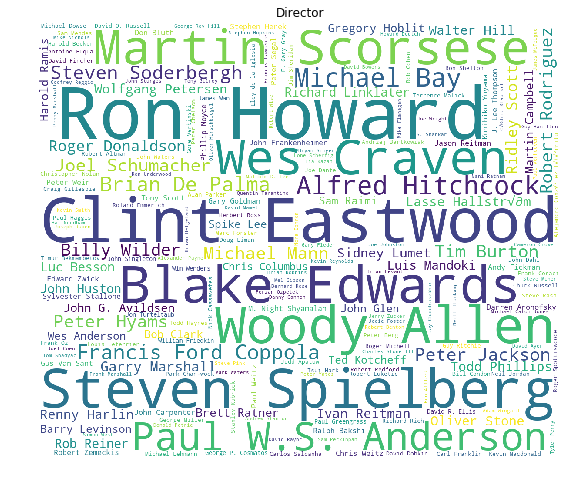

In [201]:
plt.figure(figsize = (12, 8))
text=Counter([i for j in list_of_directors for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=True,
                      width=1200, height=1000).generate_from_frequencies(text)
plt.imshow(wordcloud)
plt.title('Director')
plt.axis("off")
plt.show()

#### 4. Genre

In [53]:
print('Number of genres in films')
train['genres'].apply(lambda x: len(get_dictionary(x)) if x != {} else 0).value_counts()

Number of genres in films


2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [56]:
train['genres_list'] = train['genres'].map(lambda x: sorted([d['name'] 
                                                        for d in get_dictionary(x)])
                                     ).map(lambda x: ','.join(map(str, x)))

list_of_genres = list(train['genres'].map(lambda x: sorted([d['name'] 
                                                        for d in get_dictionary(x)])
                                     ))

In [57]:
genres = train.genres_list.str.get_dummies(sep=',')
train = pd.concat([train, genres], axis=1, sort=False)

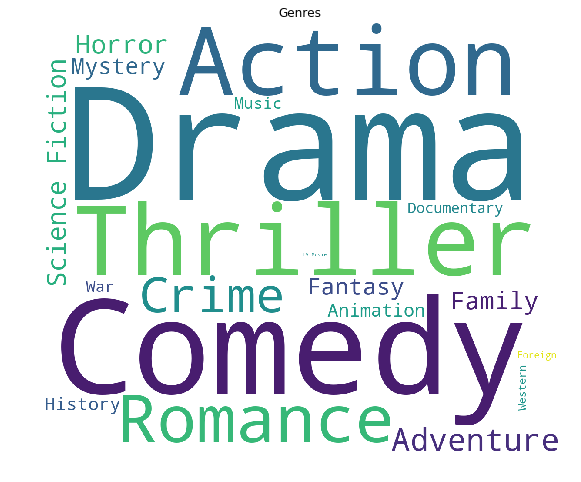

In [58]:
plt.figure(figsize = (12, 8))
text=Counter([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=True,
                      width=1200, height=1000).generate_from_frequencies(text)
plt.imshow(wordcloud)
plt.title('Genres')
plt.axis("off")
plt.show()

#### 6. Characters/Actors

In [59]:
train['character'] = train['cast'].apply(lambda x: [i['name'] for i in get_dictionary(x) 
                                                   ]).map(lambda x: ','.join(map(str, x)))

In [60]:
list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in get_dictionary(x)] if x != {} else []).values)



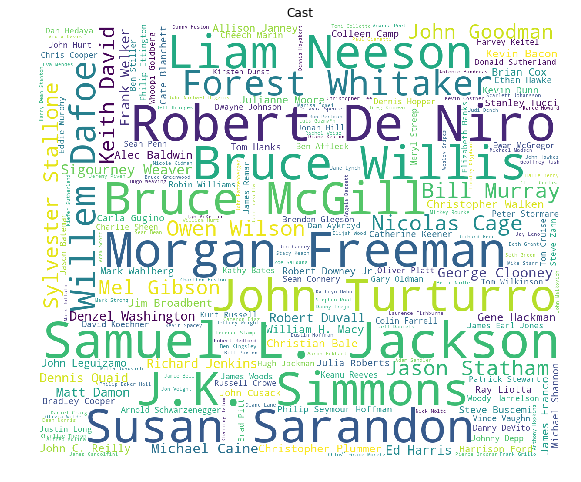

In [206]:
plt.figure(figsize = (12, 8))
text=Counter([i for j in list_of_cast_names for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=True,
                      width=1200, height=1000).generate_from_frequencies(text)
plt.imshow(wordcloud)
plt.title('Cast')
plt.axis("off")
plt.show()

#### 7. Release date

In [62]:
train['release'] = pd.to_datetime(train['release_date'])

In [63]:
train['release_quarter'] = pd.to_datetime(train.release).dt.quarter
train['release_yrquarter'] = pd.PeriodIndex(pd.to_datetime(train.release), freq = 'Q')


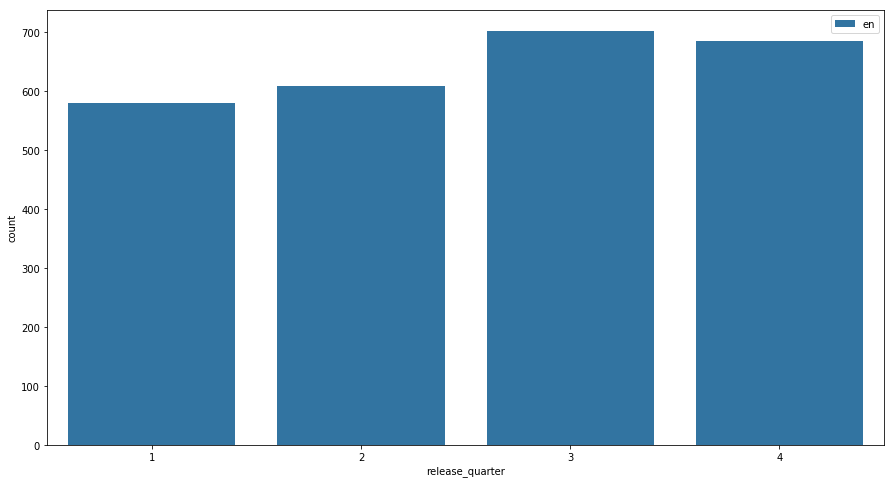

In [64]:
plt.figure(figsize = (15, 8))
sns.countplot(train.loc[train['original_language'] == 'en'].release_quarter, 
              hue = train.loc[train['original_language'] == 'en'].original_language)
plt.legend(loc='upper right')
plt.show()

## 3. Feature Engineering
What features to finally  use. I think this is just a summary after we have achieved the transformations and finished the univariable/bivariate analysis?
Target: Revenue
Inputs:
1. Budget
2. Director/Director_frequency
3. Producer/Producer_Frequency
4. Actor/Actor_Frequency
5. Genre
6. Timeline of release
7. Language (English/other)
8. Popularity
9. Runtime
10. #Countries
11. Series number (if part of series)
12. Others? Like macro-economic conditions: NASDAQ or S&P index


### Summary of Training Data Fields after Transformations

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 46 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

## 4. Machine Learning Models

This section presents the models we evaluated to predict the target variable "revenue". This includes Linear Regression, Neural Networks and Boosting models

### 1. Linear Regression

#### Basline Model

In [125]:
train_data = train[['budget', 'popularity', 'release_quarter', 'runtime', 'Action', 'Adventure',
                   'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
                    'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                   'Thriller', 'War', 'Western' ]  ]
train_rev = train['revenue']

train_data['runtime'] = pd.to_numeric(train_data['runtime'], errors='coerce')
train_data["runtime"] = train_data["runtime"].fillna(value=train_data["runtime"].mean())

x_train, x_dev, y_train, y_dev = train_test_split(train_data, train_rev, test_size=0.33, random_state=42)

In [126]:
print (train_data['runtime'].isnull().sum())

0


In [127]:
train_data['runtime'] = pd.to_numeric(train_data['runtime'], errors='coerce')
train_data["runtime"] = train_data["runtime"].fillna(value=train_data["runtime"].mean())

In [128]:
model = LinearRegression()
model.fit(x_train, y_train)
print (model.score(x_dev, y_dev))


0.5979507185657454


### 2. Neural Network implementation

#### Baseline model
Using the same input vectors used for Linear Regression, the results for a baseline NN model are presented below. The basic model with 2 hidden layers of 10 and 5 layers were used.

In [133]:
#Enable/Disable scaling
scaler = True

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

np.random.seed(0)

#Hidden Layer Sizes
hls=(10,5)

if (scaler == True):
    scaler = StandardScaler()  
    scaler.fit(x_train)  
    x_train = scaler.transform(x_train)  
    # apply same transformation to test data
    x_dev = scaler.transform(x_dev)

alpha_values = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

model = MLPRegressor(hidden_layer_sizes=hls, solver = 'lbfgs')

model.fit(x_train, y_train)
print (model.score(x_dev, y_dev))

#Optimize with GridSearchCV
clf = GridSearchCV(model, alpha_values, cv = 5)
clf.fit(x_train,y_train)
print ("Best Score", clf.best_score_)

0.5503431994653132
Best Score 0.5250209315674145


### 3. Boosting Algorithms (TBD)

## 5. Summary of Results

## 6. Conclusions and Future Work